## Problem 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 150
beta_one = 0
beta_zero = -3
beta = [beta_zero, beta_one]
error = []
#std_error = []


# We want to use the normal equations to calculate beta_hat
# Using a sample size of 150, we generate new data and record
# the error every time
for i in range(10):
    x = np.random.randn(n,)
    e = np.random.randn(n,)
    y = beta_zero + beta_one * x + e
    x_new = np.ones(len(x),)
    x_new = np.transpose(np.stack((x_new, x), axis=0))
    inv = np.linalg.inv(np.dot(x_new.T,x_new))
    beta_hat = np.dot(np.dot(inv, x_new.T), y)
    error.extend(abs(beta-beta_hat))

std_dev_error = np.std(np.array(error))

In [2]:
print(std_dev_error)

0.060995318674563793


<p>
    We can see the empirical standard deviation of the error here is 0.06. This means our value -0.15 is pretty insignificant, as it is implied to be more than two standard deviations from the mean. 
</p>
<p>
    Next we reconstruct the experiment, and allow n to get larger. We plot the values with the expected $\frac{1}{\sqrt{n}}$.
</p>

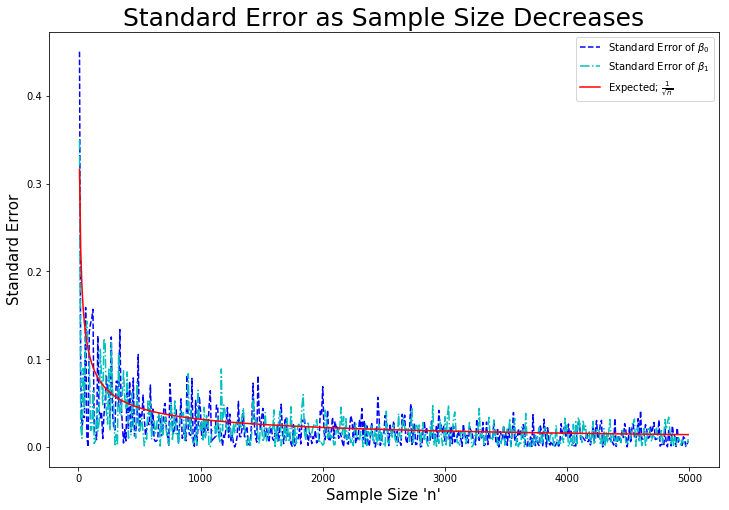

In [7]:
sample_sizes = 10*np.arange(1,500)
error_bo = []
error_b1 = []

for sample in sample_sizes:
    x = np.random.randn(sample,)
    e = np.random.randn(sample,)
    y = beta_zero + beta_one * x + e
    x_new = np.ones(len(x),)
    x_new = np.transpose(np.stack((x_new, x), axis=0))
    inv = np.linalg.inv(np.dot(x_new.T,x_new))
    beta_hat = np.dot(np.dot(inv, x_new.T), y)
    error_bo.append(abs(beta[0]-beta_hat[0]))
    error_b1.append(abs(beta[1]-beta_hat[1]))

fig = plt.figure(figsize=(12,8))
plt.plot(sample_sizes, error_bo, 'b--', label=r'Standard Error of $\beta_0$')
plt.plot(sample_sizes, error_b1, 'c-.', label=r'Standard Error of $\beta_1$')
plt.plot(sample_sizes, 1./np.sqrt(sample_sizes), 'r', label=r'Expected; $\frac{1}{\sqrt{n}}$')
plt.xlabel('Sample Size \'n\'', FontSize = 15)
plt.ylabel('Standard Error', FontSize = 15)
plt.title('Standard Error as Sample Size Decreases', FontSize=25)
_ = plt.legend()